# Project Pluto: Single Stock Price Prediction

*A simple single neuron model for stock price prediction*

# 0. Preamble

In [71]:
import os
import platform
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Import yahoo finance API
import yfinance as yf

# mount Gdrive
from google.colab import drive
drive.mount('/content/drive')

def clear_console():
    # Clear screen on Windows
    if platform.system() == 'Windows':
        os.system('cls')
    else:
        # Clear screen on Unix-based systems (macOS, Linux)
        os.system('clear')

clear_console()  # Call the function

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Import/Clean Input Data (X_train, X_test)



In [73]:
# Load the CSV into a pandas DataFrame
df_x_train = pd.read_csv('/content/sample_data/x_train.csv')
df_x_test = pd.read_csv('/content/sample_data/x_test.csv')

df_y_train = pd.read_csv('/content/sample_data/y_train.csv')
df_y_test = pd.read_csv('/content/sample_data/y_test.csv')

## Make Arrays
X_test = df_x_test.to_numpy()
X_test = X_test[:, 1:]  # Slice from index 1 to the end
X_test = np.array(X_test, dtype=np.float64)
print(X_test)

X_train = df_x_train.to_numpy()
X_train = X_train[:, 1:]  # Slice from index 1 to the end
X_train = np.array(X_train, dtype=np.float64)
print(X_train)

y_test = df_y_test.to_numpy()
y_test = y_test[:, 1:]  # Slice from index 1 to the end
print(y_test)

y_train = df_y_train.to_numpy()
y_train = y_train[:, 1:]  # Slice from index 1 to the end
print(y_train)

# print x arrays
print("x_test shape:", X_test.shape)
print("x_train shape:", X_train.shape)

# print y arrays
print("y_test shape:", y_test.shape)
print("y_train shape:", y_train.shape)

[[ 1.93590000e+10  7.26478700e+09  5.99500000e+09 -2.22200000e+09
   1.48790000e+10  8.46880000e+09  8.34400000e+09  1.55110000e+10
   2.13840000e+10  3.65000000e+08  4.13600000e+09  4.92800000e+09
   7.78000000e+08  4.86300000e+09  3.75200000e+09  1.52390000e+10
   3.51530000e+10  8.54000000e+08  4.94493300e+12  6.18400000e+09]
 [ 1.88362000e+11  2.91682480e+10  4.68420000e+10 -1.72280000e+10
   5.05580000e+10 -4.70670000e+09  7.66360000e+10  9.05710000e+10
   1.19453000e+11  3.76350000e+10  5.96460000e+10  1.27950000e+10
   4.51310000e+10  1.03970000e+10  4.54760000e+09  8.54930000e+10
   6.87740000e+10  5.58920000e+10  3.52393380e+13  2.90816000e+10]
 [ 1.40483099e+00  1.09915901e+00  1.75485298e+00  1.14033623e+00
   7.34796443e-01  1.16436798e+00  8.56911945e-01  8.31867121e-01
   1.12101143e+00  1.25196544e+00  1.09173520e+00  8.84943991e-01
   2.63538062e+00  8.72122830e-01  1.01025954e+00  1.20990265e+00
   1.15584893e+00  2.50680221e+00  1.18974526e+00  1.09568649e+00]
 [ 3.11

# 2. Hyperparameters/Initialisations

In [74]:

## Define activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return max(0, z)

def tanh(z):
    return math.tanh(z)

def linear(z):
    return z

def sigmoid_derivative(z):
  s = sigmoid(z)
  return s * (1 - s)

## Define learning rate
learning_rate = 0.02

## Define epochs
epochs = 1000

## Initialise layer counts
N_0 = X_train.shape[0]
N_1 = 1  # single neuron
N_2 = 1  # single predicted price

## Initialise layer 1 parameters
W_01 = np.random.randn(N_0, N_1)
b_1 = np.random.randn(N_2, 1)

print(f"Random layer 1 parameters:\n W_01:{W_01},\n b_1: {b_1}")

## Initialise layer 2 parameters
W_12 = np.random.randn(N_1, N_2)
b_2 = np.random.randn(N_2, 1)

print(f"\n Random layer 2 parameters:\n W_12:{W_12},\n b_2: {b_2}")

Random layer 1 parameters:
 W_01:[[ 0.36480346]
 [ 1.87797212]
 [-2.69268016]
 [ 0.60172754]],
 b_1: [[-0.91224303]]

 Random layer 2 parameters:
 W_12:[[-0.51858302]],
 b_2: [[0.4270109]]


# 3. Forward Propagation

In [75]:
def forward(X, W_01, W_12, b_1, b_2, debug=True):

  # Layer 1 weight multiplication and bias addition (automatic broadcasting)
  Z_1 = np.dot(W_01.T, X) + b_1 # Shape (N_1, T)


  if debug:
    print(f"""
    Forward Operation: Z_1 = np.dot(W_01.T, X) + b_1 # Shape (N_1, T)
    Operands: \n
    W_01.T = {W_01.T},\n
    W_01.T shape: {W_01.T.shape},\n
    X = {X},\n
    X.shape = {X.shape},\n
    b_1 = {b_1},\n
    b_1 shape = {b_1.shape}
    Z_1 = {Z_1},\n
    Z_1 shape = {Z_1.shape}
    Z_1 type = {Z_1.dtype}
    """)

  # Activate layer 1
  A_1 = sigmoid(Z_1)

  if debug:
    print(f"""\n
    Forward Operation: A_1 = sigmoid(Z_1)
    Operands: \n
    Z_1 = {Z_1},\n
    Z_1 shape: {Z_1.shape},\n
    """)

  # Layer 2 weight multiplication and bias addition
  Y_pred = np.dot(W_12.T, A_1) + b_2 # Shape (N_2, T)

  if debug:
    print(f"""\n
    Forward Operation: Y_pred = np.dot(W_12.T, A_1) + b_2 # Shape (N_2, T)
    Operands: \n
    W_12.T = {W_12.T},\n
    W_12.T shape: {W_12.T.shape},\n
    A_1 = {A_1},\n
    A_1 shape: {A_1.shape},\n
    b_1: {b_1},\n
    b_1 shape: {b_1.shape}

    \n\n

    Output: \n
    Y_pred = {Y_pred},\n
    Y_pred shape: {Y_pred.shape}
    """)

  return Y_pred, Z_1, A_1

# 4. Backward Propagation

In [76]:
# Define loss gradient
def compute_loss(Y_pred, Y_true):
    # Mean Squared Error (MSE) for Y_true (N_2, T)
    N_2 = Y_true.shape[0] # N_L = Y_true.shape[0]
    T = Y_true.shape[1]

    # 1) element-wise difference
    squared_diff = (Y_pred - Y_true)**2    # shape (N_L, T)

    # 2) sum over all elements
    sum_sq = np.sum(squared_diff)          # scalar

    # 3) divide (average) or scale
    mse = sum_sq / (2*N_2*T)               # Mean Squared Error (scalar)

    # shortened method: loss = (1/(2*N_L*T)) * np.sum((Y_pred - Y_true)**2)
    return mse

# define backpropagation algorithm
def backward(X, Y, Z_1, A_1, W_01, b_1, W_02, b_2, debug=False):
    N_2 = Y.shape[0]
    T = Y.shape[1]

    # Gradients of loss wrt. y_pred
    dY_pred = ( 1 / (N_2 * T) ) * ( Y_pred - Y ) # Shape (N_L, T)

    if debug:
      print(f"""\n
      Backward Operation: dY_pred = ( 1 / (N_2 * T) ) * ( Y_pred - Y ) # Shape (N_2, T)
      Operands: \n
      Y_pred = {Y_pred},\n
      Y_pred shape: {Y_pred.shape},\n
      Y_true = {Y_true},\n
      Y_true shape: {Y_true.shape},\n
      \n
      Outputs:
      dY_pred = {dY_pred},\n
      dY_pred shape: {dY_pred.shape}
      """)

    # Gradients for W_12 and b_2
    dW_12 = np.dot(A_1, dY_pred.T) # Shape (N_L-1, N_L)

    if debug:
      print(f"""\n
      Backward Operation: dW_12 = np.dot(A_1, dY_pred.T) # Shape (N_L-1, N_L)
      Operands: \n
      A_1 = {A_1},\n
      A_1 shape: {A_1.shape},\n
      dY_pred = {dY_pred},\n
      dY_pred shape: {dY_pred.shape},\n
      \n
      Outputs:
      dW_12 = {dW_12},\n
      dW_12 shape: {dW_12.shape}
      """)


    db_2 = np.sum(dY_pred , axis =1, keepdims=True ) # Shape (N_L, 1)

    if debug:
      print(f"""\n
      Backward Operation: db_2 = np.sum(dY_pred , axis =1, keepdims=True ) # Shape (N_L, 1)
      Operands: \n
      dY_pred = {dY_pred},\n
      dY_pred shape: {dY_pred.shape},\n
      \n
      Outputs:
      db_2 = {db_2},\n
      db_2 shape: {db_2.shape}
      """)


    # Backprop through Sigmoid
    dA_1 = np.dot(W_12 , dY_pred) # Shape (N_L-1, T)

    if debug:
      print(f"""\n
      Backward Operation: dA_1 = np.dot(W_12 , dY_pred) # Shape (N_L-1, T)
      Operands: \n
      W_12 = {W_12},\n
      W_12 shape: {W_12.shape}, \n
      dY_pred = {dY_pred},\n
      dY_pred shape: {Y_pred.shape},\n
      \n
      Outputs:
      dA_1 = {dA_1},\n
      dA_1 shape: {dA_1.shape}
      """)

    dZ_1 = dA_1*sigmoid_derivative(Z_1) # Shape (N_L-1, T)

    if debug:
      print(f"""\n
      Backward Operation: dZ_1 = dA_1*sigmoid_derivative(Z_1) # Shape (N_L-1, T)
      Operands: \n
      Z_1 = {Z_1},\n
      Z_1 shape: {Z_1.shape},\n
      \n
      Outputs:
      dZ_1 = {dZ_1},\n
      dZ_1 shape: {dZ_1.shape}
      """)

    # Gradients for W1 and b1
    dW_01 = np.dot(X, dZ_1.T) # Shape (N_L-2, N_L-1)

    if debug:
      print(f"""\n
      Backward Operation: dW_01 = np.dot(X, dZ_1.T) # Shape (N_L-2, N_L-1)
      Operands: \n
      X = {X},\n
      X shape: {X.shape},\n
      dZ_1.T = {dZ_1.T},\n
      dZ_1.T shape: {dZ_1.T.shape},\n
      \n
      Outputs:
      dW_01 = {dW_01},\n
      dW_01 shape: {dW_01.shape}
      """)

    db_1 = np.sum(dZ_1, axis =1, keepdims=True ) # Shape (N_L-1, 1)

    if debug:
      print(f"""\n
      Backward Operation: db_1 = np.sum(dZ_1.T , axis =1, keepdims=True ) # Shape (N_L-1, 1)
      Operands: \n
      dZ_1.T = {dZ_1.T},\n
      dZ_1.T shape: {dZ_1.T.shape}, \n
      db_1 = {db_1},\n
      \n
      Outputs:
      db_1 = {db_1},\n
      db_1 shape: {db_1.shape}
      """)

    return dW_01, db_1, dW_12, db_2


# 5. Plotting

In [77]:
def plot_loss(loss_history):
  plt.figure(figsize=(8, 6))
  plt.plot(range(1, epochs+1), loss_history, marker='o', linestyle='-')
  plt.title("Loss vs. Epochs")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.grid(True)
  plt.show()

# 6. Main Execution: Gradient Descent

Streaming output truncated to the last 5000 lines.
   1.62100000e+09  1.73630000e+09  3.26800000e+09 -3.68000000e+09]],

    X.shape = (4, 80),

    b_1 = [[9.61988681]],

    b_1 shape = (1, 1)
    Z_1 = [[ 2.06617898e+11  5.80915200e+11  6.00915589e+11  4.09600624e+11
   1.07827317e+11  1.27549343e+11  3.28292267e+11  6.96941910e+12
   9.19486026e+10  4.32404798e+11  2.09385357e+11  1.82834241e+10
   2.37781620e+10  3.23795804e+11  2.04167966e+10  4.30780821e+10
   7.82824764e+10  7.35488703e+10  6.13802165e+10  1.29662163e+11
   2.72774584e+11  1.71337474e+11  1.40929852e+11  1.70161286e+11
   3.31601486e+10  3.71776893e+10  4.48045453e+10  9.52753887e+10
   7.96766056e+10  1.98535290e+11  1.88158241e+11  4.85778474e+11
   2.05131363e+11  1.81182463e+11  8.70925691e+10  1.29229221e+11
   2.82735793e+10  3.00768562e+10  2.27056631e+10  1.01786999e+11
  -1.01456971e+10  1.05669239e+11  3.29705786e+10  3.49186959e+10
   5.24968787e+10  1.19395893e+11  5.10378164e+10  1.76184127e+10
   

<ipython-input-74-e9d4c0de4c21>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Streaming output truncated to the last 5000 lines.
  176.73865269 177.65089572 176.73865269 176.73865269 176.73865269
  176.73865269 176.73865269 176.73865269 177.65089572 176.73865269
  176.73865269 176.73865269 176.73865269 176.73865269 176.73865269
  176.73865269 176.73865269 176.73865269 176.73865269 176.73865269
  176.73865269 176.73865269 176.73865269 176.73865269 176.73865269]],

    Y_pred shape: (1, 80)
    

    Forward Operation: Z_1 = np.dot(W_01.T, X) + b_1 # Shape (N_1, T)
    Operands: 

    W_01.T = [[ 0.36480346  1.87797212 -2.69268016  0.60172754]],

    W_01.T shape: (1, 4),

    X = [[ 9.37360000e+10  8.81360000e+10  7.37950000e+10  3.04250000e+10
   2.97600000e+10  1.49990000e+10  3.90980000e+10  8.51740000e+11
   1.97430000e+10  3.60100000e+10  2.23810000e+10  1.51430000e+10
   1.11950000e+10  2.13690000e+10  5.24040000e+09  9.07400000e+09
   1.12090000e+10  1.14980000e+10  1.07140000e+10  1.51740000e+10
   8.36830000e+10  2.11900000e+09  5.89500000e+09  1.5388000

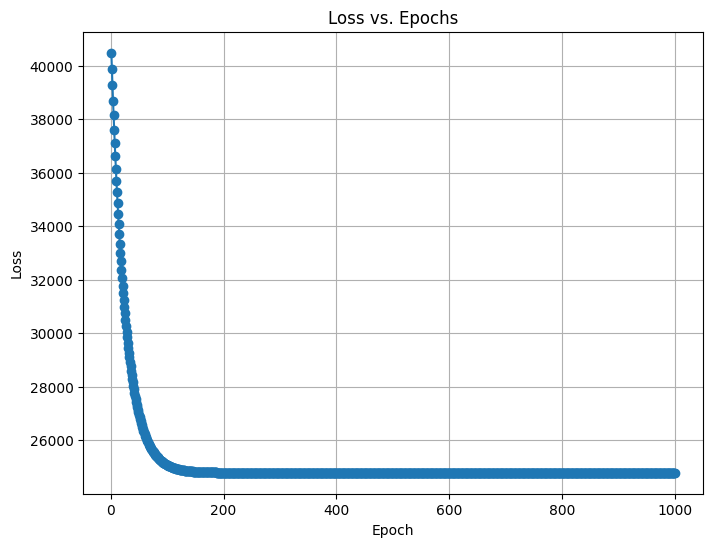

In [78]:
# Store the loss at each epoch
loss_history = []

# Gradient Descent (training steps, batch-size,
for i in range(epochs):
    # Forward pass
    Y_pred, Z_1, A_1 = forward(X_train, W_01, b_1, W_12,  b_2)

    # Compute loss and store for plot
    loss = compute_loss(Y_pred, y_train)
    # print(f"Epoch {i+1}/{epochs}, Loss: {loss}") # Printing each loss is kinda long...optional

    loss_history.append(loss)

    # Backward pass
    dW_01, db_1, dW_12, db_2 = backward(X_train, y_train, Z_1, A_1, W_01, b_1, W_12, b_2)

    # Update parameters (No need to flatten parameters into a single vector)
    W_01 = np.array(W_01, dtype=np.float64)
    dW_01 = np.array(dW_01, dtype=np.float64)
    W_01 -= learning_rate * dW_01

    b_1 = np.array(b_1, dtype=np.float64)
    db_1 = np.array(db_1, dtype=np.float64)
    b_1 -= learning_rate * db_1

    W_12 = np.array(W_12, dtype=np.float64)
    dW_12 = np.array(dW_12, dtype=np.float64)
    W_12 -= learning_rate * dW_12

    b_2 = np.array(b_2, dtype=np.float64)
    db_2 = np.array(db_2, dtype=np.float64)
    b_2 -= learning_rate * db_2

# After training completes, plot the loss over epochs
plot_loss(loss_history)

W_01_trained = W_01
b_1_trained = b_1
W_12_trained = W_12
b_2_trained = b_2


## 7. Test Block

In [80]:
# Forward pass
Y_pred_test, Z_1, A_1 = forward(X_test, W_01_trained, b_1_trained, W_12_trained,  b_2_trained)

# Compute loss and store for plot
loss = compute_loss(Y_pred_test, y_test)
# print(f"Epoch {i+1}/{epochs}, Loss: {loss}") # Printing each loss is kinda long...optional

print(f"Test Loss: {loss}")



    Forward Operation: Z_1 = np.dot(W_01.T, X) + b_1 # Shape (N_1, T)
    Operands: 

    W_01.T = [[ 0.36480346  1.87797212 -2.69268016  0.60172754]],

    W_01.T shape: (1, 4),

    X = [[ 1.93590000e+10  7.26478700e+09  5.99500000e+09 -2.22200000e+09
   1.48790000e+10  8.46880000e+09  8.34400000e+09  1.55110000e+10
   2.13840000e+10  3.65000000e+08  4.13600000e+09  4.92800000e+09
   7.78000000e+08  4.86300000e+09  3.75200000e+09  1.52390000e+10
   3.51530000e+10  8.54000000e+08  4.94493300e+12  6.18400000e+09]
 [ 1.88362000e+11  2.91682480e+10  4.68420000e+10 -1.72280000e+10
   5.05580000e+10 -4.70670000e+09  7.66360000e+10  9.05710000e+10
   1.19453000e+11  3.76350000e+10  5.96460000e+10  1.27950000e+10
   4.51310000e+10  1.03970000e+10  4.54760000e+09  8.54930000e+10
   6.87740000e+10  5.58920000e+10  3.52393380e+13  2.90816000e+10]
 [ 1.40483099e+00  1.09915901e+00  1.75485298e+00  1.14033623e+00
   7.34796443e-01  1.16436798e+00  8.56911945e-01  8.31867121e-01
   1.12101143e+00

<ipython-input-74-e9d4c0de4c21>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
